<a href="https://colab.research.google.com/github/keshari112k/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Predicting heart disease**


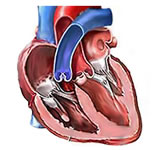

In [253]:
# Data information:
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Data source
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

# Import and process the data

In [254]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# preprocessing

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC, LinearSVC
#from sklearn.linear_model import Perceptron
from sklearn.metrics import average_precision_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,f1_score,auc,classification_report

import matplotlib.pyplot as plt # this is used for the plot the graph 
%matplotlib inline
import seaborn as sns # used for plot interactive graph.

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif
#from sklearn.datasets import make_classification

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


## **Upload Dataset**

In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
# Upload Dataset
data = pd.read_csv(r"/content/drive/MyDrive/Deep Learning/heart(original).csv")

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [257]:
# describe the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preprocessing

In [258]:
# Check if any null value is present
data.isnull().values.any()

False

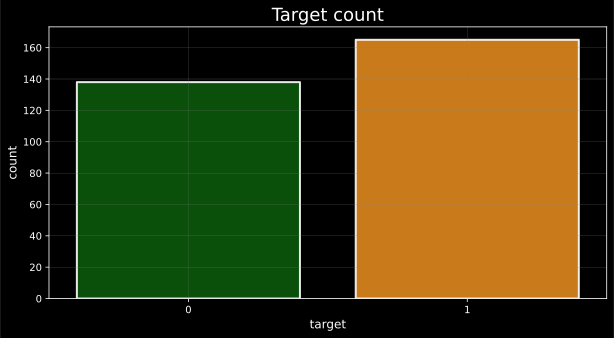

Percentage Haven't Heart Disease: 45.54%
Percentage Have Heart Disease: 54.46%


In [259]:
colors = ['darkgreen', 'darkorange']
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(10,5)

ax = sns.countplot(x='target', data=data, palette=colors, alpha=0.9, edgecolor=('white'), linewidth=2)
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('target', fontsize=12)
ax.grid(b=True, which='major', color='grey', linewidth=0.2)
plt.title('Target count', fontsize=18)
plt.show()
target_0 = len(data[data.target == 0])
target_1 = len(data[data.target == 1])
print("Percentage Haven't Heart Disease: {:.2f}%".format((target_0 / (len(data.target))*100)))
print("Percentage Have Heart Disease: {:.2f}%".format((target_1 / (len(data.target))*100)))

In [260]:
output='target'
X=data.iloc[:,data.columns!=output]
y=data.iloc[:,data.columns==output]
X.shape, y.shape

((303, 13), (303, 1))

### Split features and target

In [261]:
output='target'
X=data.iloc[:,data.columns!=output]
y=data.iloc[:,data.columns==output]
X.shape, y.shape

((303, 13), (303, 1))

## **Train Test Split**

# Split the Data into Train and Test set

We will split our data. 80% of our data will be train data and 15% of it will be test data.

In [262]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=15,random_state = 0)


## **Model Building**

### 1. Support Vector Machine 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM_classifier_accuracy for training dataset:   85.07
SVM_classifier_accuracy for testing dataset:   86.67


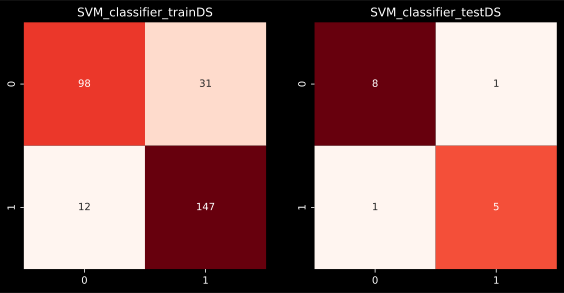

In [263]:
# Support Vector Machines
svc=SVC(kernel='linear',random_state=0)
#svc = SVC(random_state = 1)
svc.fit(Xtrain, Ytrain)
svc_pred=svc.predict(Xtrain)
svc_cm=confusion_matrix(Ytrain,svc_pred)

svc_acc = round(svc.score(Xtrain, Ytrain) * 100, 2)
print('SVM_classifier_accuracy for training dataset:  ',svc_acc)

#SVM classifier for test dataset
test_svc_acc = round(svc.score(Xtest, Ytest) * 100, 2)
print('SVM_classifier_accuracy for testing dataset:  ',test_svc_acc)
test_svc_pred=svc.predict(Xtest)
test_svc_cm=confusion_matrix(Ytest,test_svc_pred)

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("SVM_classifier_trainDS")
sns.heatmap(svc_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("SVM_classifier_testDS")
sns.heatmap(test_svc_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.show()


### 2. Naive Byes

NB_classifier_accuracy for training dataset:   83.33
NB_classifier_accuracy for training dataset:   80.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


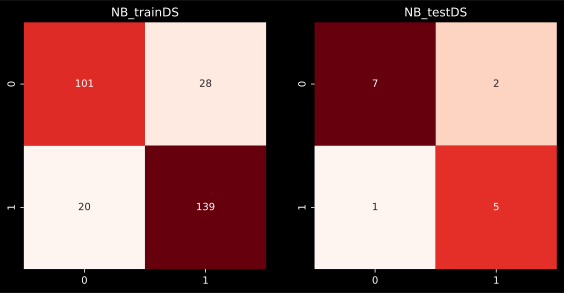

In [264]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(Xtrain, Ytrain)
nb_pred=gaussian.predict(Xtrain)
nb_cm=confusion_matrix(Ytrain,nb_pred)
acc_gaussian = round(gaussian.score(Xtrain, Ytrain) * 100, 2)
print('NB_classifier_accuracy for training dataset:  ',acc_gaussian)

nb_test_pred=gaussian.predict(Xtest)
nb_test_cm=confusion_matrix(Ytest,nb_test_pred)
acc_test_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
print('NB_classifier_accuracy for training dataset:  ',acc_test_gaussian)

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("NB_trainDS")
sns.heatmap(nb_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("NB_testDS")
sns.heatmap(nb_test_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.show()

### 3. K nearest neighbous

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNN Classifier for training dataset:   81.25
Accuracy of KNN Classifier for testing dataset:   80.0


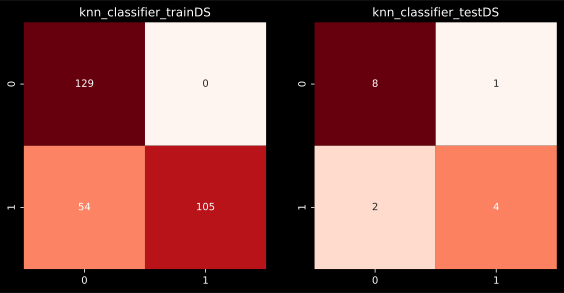

In [265]:
#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain,Ytrain)
knn_pred=knn.predict(Xtrain)
knn_cm=confusion_matrix(Ytrain,knn_pred)
knn_ac=round(knn.score(Xtrain,Ytrain)*100,2)
print("Accuracy of KNN Classifier for training dataset:  ",knn_ac)

knn_pred=knn.predict(Xtest)
knn_test_cm=confusion_matrix(Ytest,knn_pred)
#knn_ac=accuracy_score(knn_pred,target_test)
knn_test_ac=round(knn.score(Xtest,Ytest)*100,2)
print("Accuracy of KNN Classifier for testing dataset:  ",knn_test_ac)

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("knn_classifier_trainDS")
sns.heatmap(knn_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("knn_classifier_testDS")
sns.heatmap(knn_test_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.show()

### 4. Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression_accuracy:	 85.42
LogisticRegression_accuracy for testing dataset:   86.67


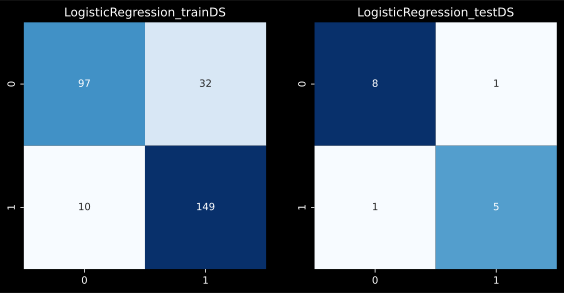

In [266]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
#lr_c=LogisticRegression()
lr_c.fit(Xtrain,Ytrain)
lr_pred=lr_c.predict(Xtrain)
lr_cm=confusion_matrix(Ytrain,lr_pred)
#lr_ac=accuracy_score(target, lr_pred)
lr_ac = round(lr_c.score(Xtrain, Ytrain) * 100, 2)
print('LogisticRegression_accuracy:\t',lr_ac)

#LogisticRegression classifier for test dataset
test_lr_ac = round(lr_c.score(Xtest, Ytest) * 100, 2)
print('LogisticRegression_accuracy for testing dataset:  ',test_lr_ac)
test_lr_pred=lr_c.predict(Xtest)
test_lr_cm=confusion_matrix(Ytest,test_lr_pred)

# Model Evaluation
# Confusion Matrix

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression_trainDS")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("LogisticRegression_testDS")
sns.heatmap(test_lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

### 5. Voting Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

VotingClassifier_accuracy for train dataset:   86.46
VotingClassifier_accuracy for test dataset:   86.67


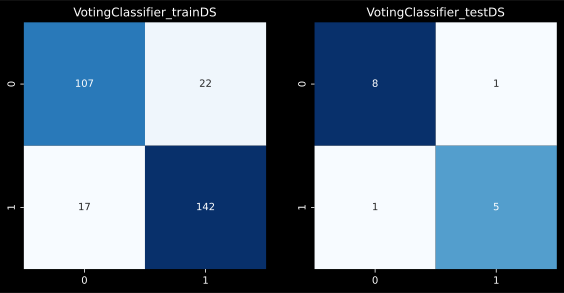

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15



In [267]:
# Make prediction on validation dataset
eclf=VotingClassifier(estimators=[('svc', svc),('NB', gaussian), ('knn', knn),('lr_c',lr_c)], voting='hard')
model=eclf.fit(Xtrain,Ytrain)
train_pred=model.predict(Xtrain)
train_vote_cm=confusion_matrix(Ytrain, train_pred)
acc_VC_hard = round(eclf.score(Xtrain, Ytrain) * 100, 2)
print("VotingClassifier_accuracy for train dataset:  ",acc_VC_hard)


vote_ac=round(eclf.score(Xtest, Ytest) * 100, 2)
print('VotingClassifier_accuracy for test dataset:  ',vote_ac)
pred=model.predict(Xtest)
vote_cm=confusion_matrix(Ytest,pred)

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("VotingClassifier_trainDS")
sns.heatmap(train_vote_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("VotingClassifier_testDS")
sns.heatmap(vote_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

print(classification_report(Ytest,pred))


### **Score Diff and plot**

In [268]:
models = pd.DataFrame({
    'Model': ['SVM','NB','KNN','Log.Reg','VotingClassifier'],
    'Score_train': [svc_acc, acc_gaussian, knn_ac,lr_ac, acc_VC_hard],
    'Score_test': [test_svc_acc,acc_test_gaussian, knn_test_ac,test_lr_ac, vote_ac]
                    })

models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)
#models.sort_values(by=['Score_test'], ascending=False)

,Model,Score_train,Score_test,Score_diff
4,VotingClassifier,86.46,86.67,0.21
3,Log.Reg,85.42,86.67,1.25
0,SVM,85.07,86.67,1.60
1,NB,83.33,80.00,3.33
2,KNN,81.25,80.00,1.25


### **Graph Visualization**

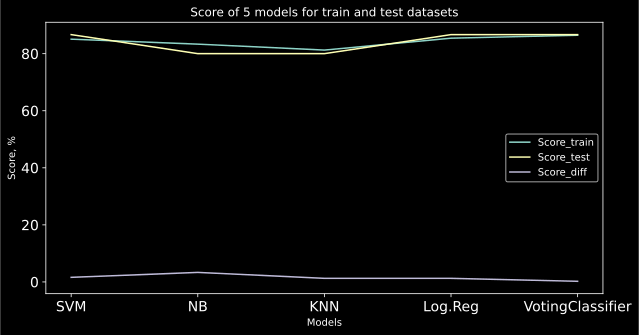

In [269]:
# Plot
plt.figure(figsize=[10,5])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.plot(xx, models['Score_diff'], label = 'Score_diff')
plt.legend()
plt.title('Score of 5 models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='horizontal')
plt.savefig('graphFS.jpg')
plt.show()

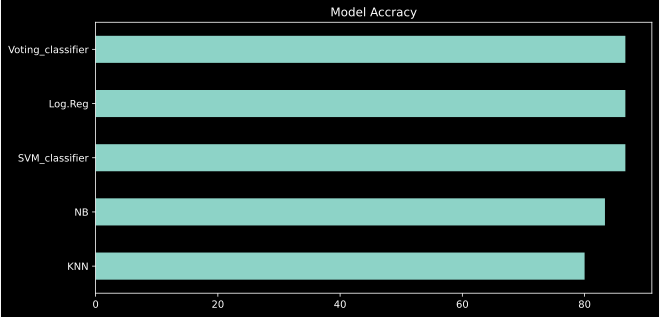

In [273]:
model_accuracy = pd.Series(data=[test_svc_acc,acc_gaussian, knn_test_ac,test_lr_ac, vote_ac], 
                index=['SVM_classifier','NB','KNN','Log.Reg','Voting_classifier'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')
plt.show()

In [271]:
new_input=[[52,0,3,90,500,1,2,180,0,0.5,2,2,1]]
# get prediction for new input
new_output=model.predict(new_input)
print(new_input,new_output)
if new_output == 1:
    print("Patient has heart disease")
else:
    print("Patient has not heart disease")

[[52, 0, 3, 90, 500, 1, 2, 180, 0, 0.5, 2, 2, 1]] [1]
Patient has heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Make Prediction**

In [272]:
# print("Enter the values for selected features seperated by comma")
# t1=tuple([eval(x) for x in input().split(',')])

# prediction=model.predict([(t1)])
# print("Prediction for given data is: ",prediction)
# if prediction == 1:
#     print("Patient has heart disease")
# else:
#     print("Patient has not heart disease")